# In-depth K-means Clustering
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [1]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np    

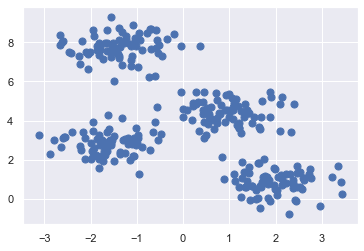

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples=300,centers=4,
                     cluster_std=0.60, random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)  #为什么plot的这个

In [4]:
y_true # 0,1,2,3; 4 cluster centers

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [7]:
np.size(X)

600

In [8]:
np.shape(X)

(300, 2)

In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4) #set para for a function
kmeans.fit(X) #use the function
y_kmeans=kmeans.predict(X)

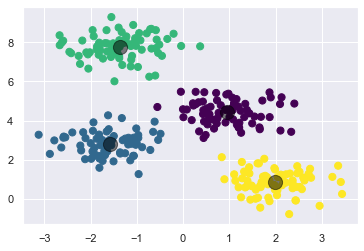

In [15]:
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers=kmeans.cluster_centers_    #plot cluster centers
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5) #s: size, c=color,

# k-Means Algorithm: Expectation Maximum

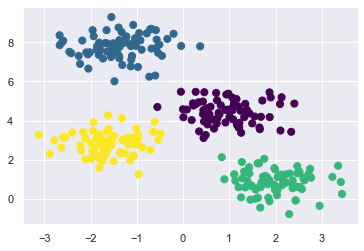

In [26]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1. randomly choose clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
     
    while True:
        #2a. Assign labels based on closer center          
        labels = pairwise_distances_argmin(X, centers)  ####用包里自带的函数求最小距离，assign labels
        
        #2b. Find new centers from means of points
        new_centers=np.array([X[labels ==i].mean(0)    ###对一个label i， 其中所有的X的值mean()函数，好厉害的语句
                            for i in range(n_clusters)])
        #2c. Check for convergence                        #max iteration times, or until converge
        if np.all(centers == new_centers):
            break
        centers=new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=labels,
           s=50, cmap='viridis');


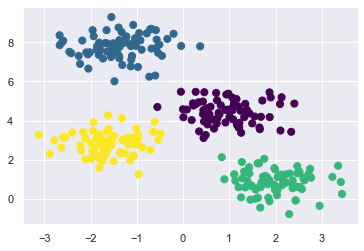

# Caveat of EM

## The global optimal result may not be achieved

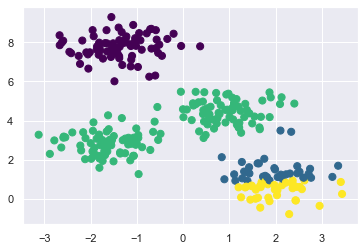

In [27]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:,0], X[:,1], c=labels,
           s=50, cmap='viridis');

Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the n_init parameter, which defaults to 10)
## the number of clusters must be selected beforehand

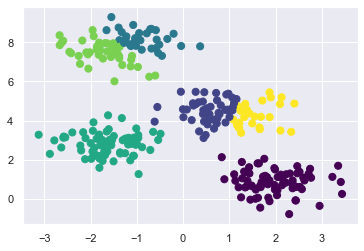

In [28]:
labels = KMeans(6, random_state=0).fit_predict(X)   #连续使用函数
plt.scatter(X[:,0], X[:,1],c=labels,
           s=50, cmap='viridis');

# k-means is limited to linear cluster boundaries

In [38]:
from sklearn.datasets import make_moons
X, y=make_moons(200, noise=.005, random_state=0)

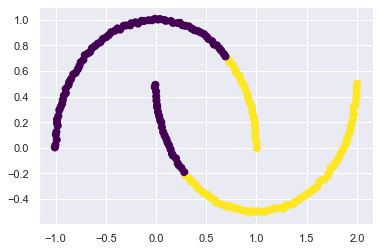

In [39]:
labels =KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, 
           s=50, cmap='viridis')

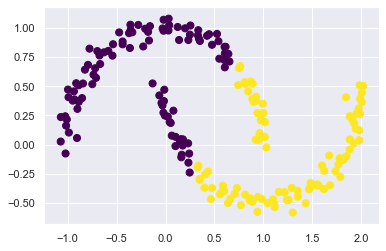

In [33]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## kernelized k-means
One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

C:\Users\tianh\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


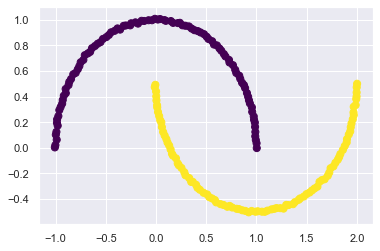

In [41]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels,
           s=50, cmap='viridis');

We see that with this kernel transform approach, the kernelized k-means is able to find the more complicated nonlinear boundaries between clusters.
## K-means can be slow for large numbers of samples
# Examples

In [42]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape # 1796 data, each dimension is 64

(1797, 64)

In [43]:
kmeans=KMeans(n_clusters=10, random_state=0)
clusters=kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

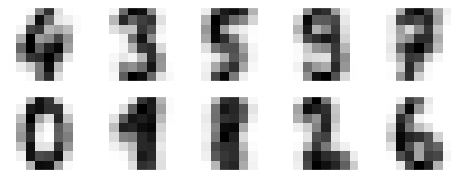

In [46]:
fig, ax= plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8) 

for axi, center in zip(ax.flat, centers):    #注意zip用法
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary) #cm?????

In [47]:
# Because k-means knows nothing about the identity of the cluster, 
# the 0–9 labels may be permuted.
# We can fix this by matching each learned cluster label with the true labels found in them:
from scipy.stats import mode

labels = np.zeros_like(clusters)

for i in range(10):
    mask=(clusters==i)
    labels[mask]=mode(digits.target[mask])[0]

In [48]:
#Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Text(89.18, 0.5, 'predicted label')

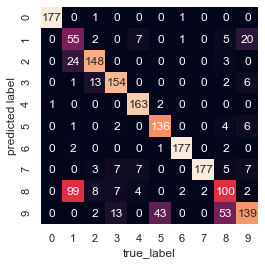

In [51]:
# With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! 
# Let's check the confusion matrix for this:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true_label');
plt.ylabel('predicted label')

Just for fun, let's try to push this even farther. We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm (mentioned in In-Depth: Manifold Learning) to pre-process the data before performing k-means. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters. Let's see how it does:

In [54]:
from sklearn.manifold import TSNE

#Project the data: this step will take several seconds
tsne=TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

#compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

#permute the labels
labels= np.zeros_like(clusters)  #Return an array of zeros with the same shape and type as a given array.

for i in range(10):
    mask=(clusters ==i)
    labels[mask]=mode(digits.target[mask])[0]
    
#compute the accuracy
accuracy_score(digits.target, labels)


0.9326655537006121

That's nearly 92% classification accuracy without using the labels. This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to do by hand or by eye.


## Example 2: k-means for color compression

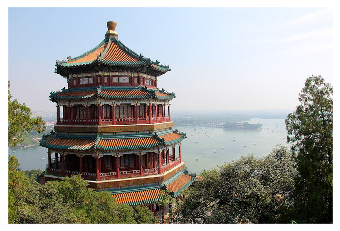

In [56]:
#Note: this requires the  ''pillow package to be installed
from sklearn.datasets import load_sample_image
china=load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[]) #blanck labels , 设定plot的属性参数先，再套用到要show的图片上
ax.imshow(china);

In [57]:
china.shape

(427, 640, 3)

In [58]:
data = china/255.0 # use 0...1 scale
data = data.reshape(427*640, 3)


In [59]:
data.shape

(273280, 3)

In [66]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data
        
    #choose a random subset
    rng  = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B=data[i].T
    
    
    fig, ax= plt.subplots(1,2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Bule', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20);

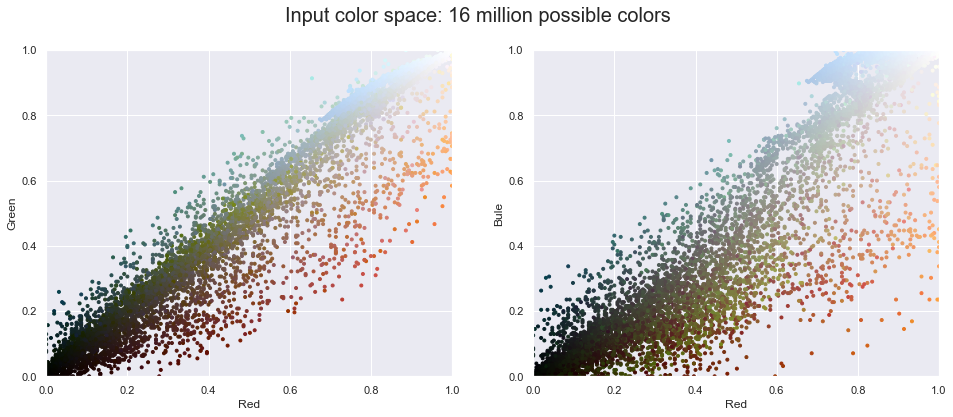

In [67]:
plot_pixels(data, title='Input color space: 16 million possible colors')  #画出像素点的分布

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

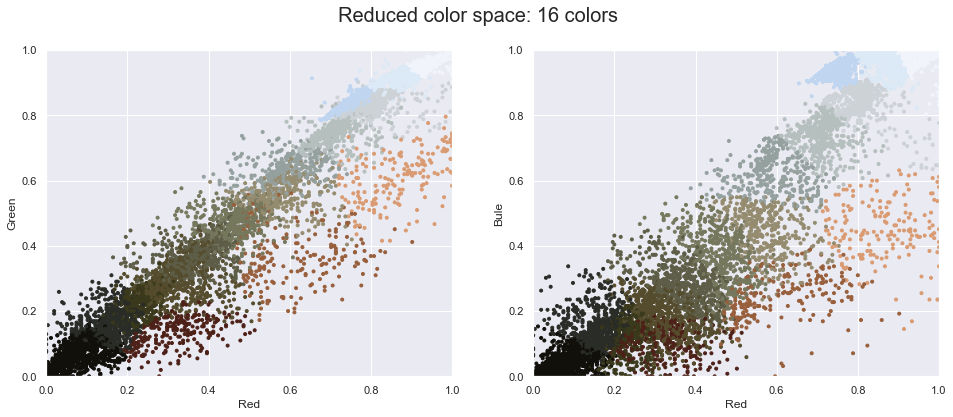

In [68]:
import warnings; warnings.simplefilter('ignore') #Fix Numpy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
           title='Reduced color space: 16 colors')

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

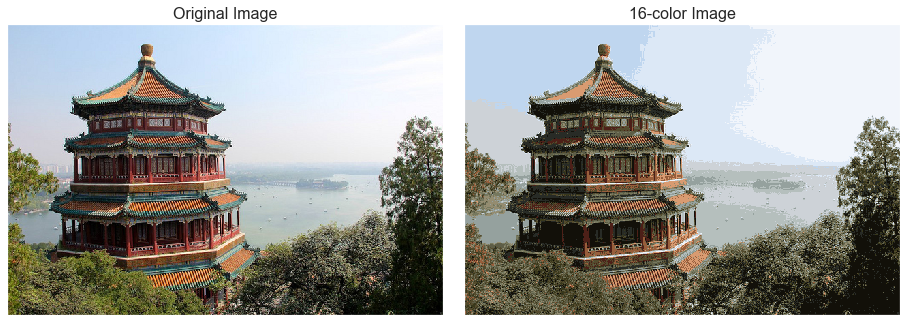

In [69]:
china_recolored=new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6),
                      subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. This image on the right achieves a compression factor of around 1 million! While this is an interesting application of k-means, there are certainly better way to compress information in images. But the example shows the power of thinking outside of the box with unsupervised methods like k-means.